## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.shape

(2443651, 9)

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Generate a frequency table for the product 'category'.

frequency_table = df['category'].value_counts()


In [7]:
# Which are the top 5 most listed product categories?
frequency_table[:5]

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

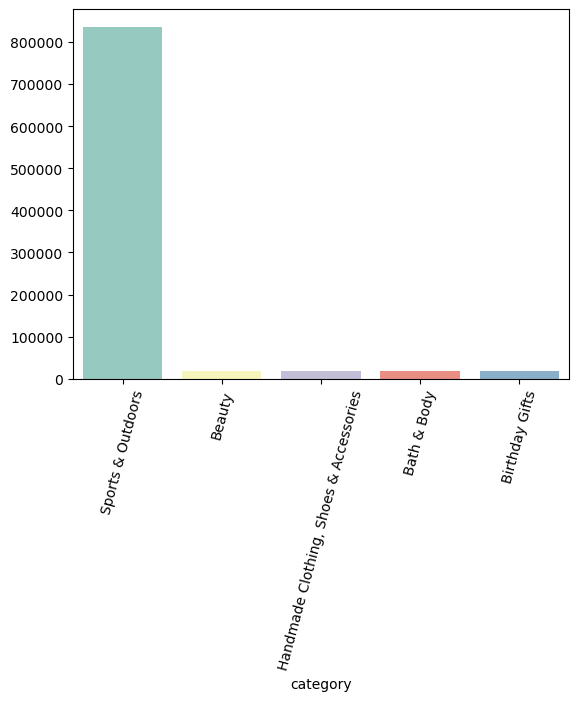

In [11]:
# Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a 
# subset of top categories.

sns.barplot(x=frequency_table[:5].index, y=frequency_table[:5].values, palette="Set3")
plt.xticks(rotation=75)  

<Axes: ylabel='count'>

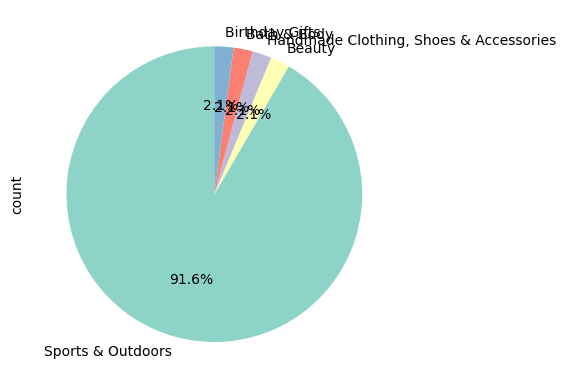

In [20]:
# For a subset of top categories, visualize their proportions using a pie chart. 
#subset:
top_categories = frequency_table[:5].index.tolist()
#db with top categories:
df_top = df[df['category'].isin(top_categories)]
df_top['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

# Does any category dominate the listings? Yes: Sports & Outdoors with 91.6% of total sales.

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [35]:
# 1. Measures of Centrality
# - Calculate the mean, median, and mode for the `price` of products.
print(f"mean for the price: {df['price'].mean()}")
print(f"median for the price: {df['price'].median()}")
print(f"mode for the price: {df['price'].mode()[0]}")

mean for the price: 89.24380943923663
median for the price: 19.09
mode for the price: 9.99


In [ ]:
# - What's the average price point of products listed? How does this compare with the most common price point (mode)?
# - The average price (mean) is around 9 times greater than mode, indicating that there are also quite expensive products that, while not the most 
# common, are significantly ordered. Also, it could suggest that the distribution of sales is positively skewed.

In [33]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [4]:
# 2. Measures of Dispersion
# - Determine the variance, standard deviation, range, and interquartile range for product `price`.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
max_price = df['price'].max()
min_price = df['price'].min()
range_price = max_price - min_price
iq_range = df['price'].quantile(0.75) - df['price'].quantile(0.25)

variance_price, std_dev_price, range_price, iq_range

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

In [ ]:
# - How varied are the product prices? Are there any indicators of a significant spread in prices? 
# Considering that the mean is 89.24 and the standatd deviation is 345.60, prices are highly dispersed.

<Axes: xlabel='price', ylabel='Count'>

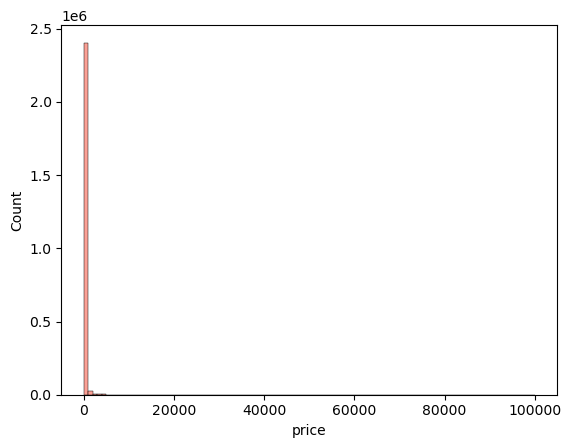

In [7]:
# 3. Visualizations
# - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read 
# these diagrams, think why this is, and explain how it could be solved.
sns.histplot(df['price'], kde=False, bins=100, color="salmon")

(0.0, 400.0)

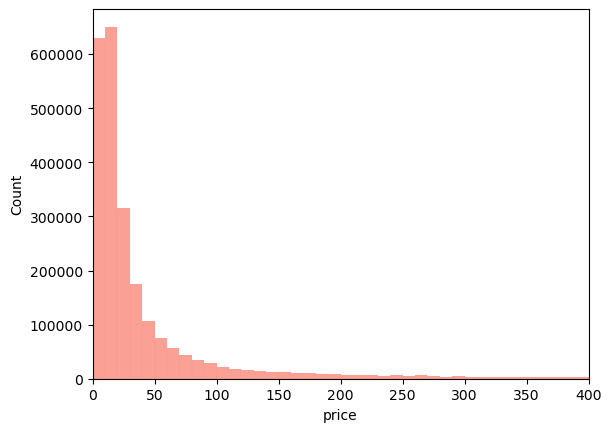

In [18]:
# Yes, it is hard to read it because there are a set of products with same price that are sold too many times.
# We can either cut the y axis or remove the outliers. Here we cut the y axis and increase bins
sns.histplot(df['price'], kde=False, bins=10000, color="salmon")
plt.xlim(0, 400)

(0.0, 100.0)

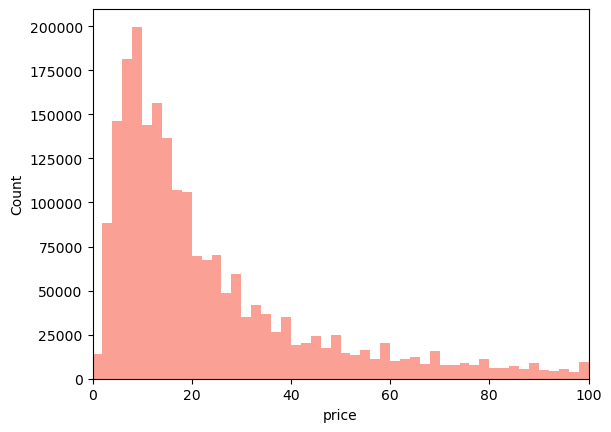

In [20]:
sns.histplot(df['price'], kde=False, bins=50000, color="salmon")
plt.xlim(0, 100)

In [ ]:
# As we can see, the majority of product range between zero and 20 euros.

<Axes: >

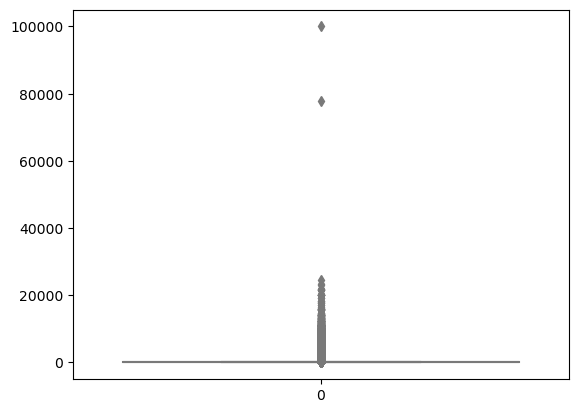

In [7]:
# - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(data = df['price'], color = 'lightblue')

# As we can observe, there are outliers with extremely higher values than those located in the interquartile range. 

<Axes: >

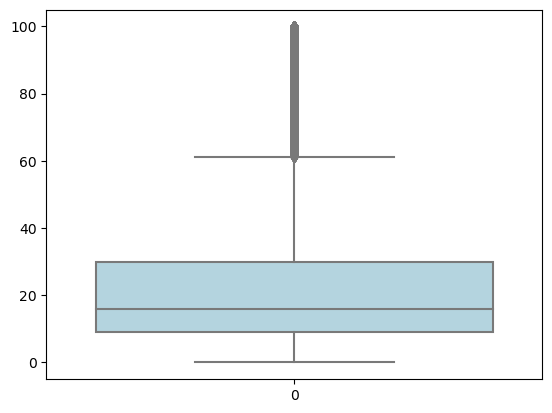

In [10]:
# Let's filter out outliers so that we can observe better values between quartile 1 and 3:
# Calculate Q1 and Q3:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

sns.boxplot(data = df_no_outliers['price'], color = 'lightblue')

# with this approach still we have some outliers but we can observer the interquartile range, as well as the wiskhers.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [11]:
# - Calculate the mean, median, and mode for the `rating` of products.
# - How do customers generally rate products? Is there a common trend?
reviews_mean = df['stars'].mean()
reviews_median = df['stars'].median()
reviews_mode = df['stars'].mode()

reviews_mean, reviews_median, reviews_mode

# The most frequent rating is zero stars, so the common trend is customers giving the minimum rating.

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

In [12]:
# - Determine the variance, standard deviation, and interquartile range for product `rating`.

variance_reviews = df['stars'].var(0)
std_reviews = df['stars'].std()
iq_range = df['stars'].quantile(0.25) - df['stars'].quantile(0.75)

variance_reviews, std_reviews, iq_range

# - Are the ratings consistent, or is there a wide variation in customer feedback?
# Ratings have a wide variation since standard deviation is greater than the mean. It is worth it to say that interquartile range is almost as wide as
# rating itself, indicating again that there is a wide variation.

(4.81743402976196, 2.1948653785054697, -4.4)

In [13]:
# - Calculate the skewness and kurtosis for the `rating` column. 
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

# - Are the ratings normally distributed, or do they lean towards higher or lower values?
# They are normally distributed since skewness is close to zero indicating low asymmetry. Skewness value of 0.0812 suggests a slightly positively skewed 
# distribution, so ratings have a tendency to be slightly higher than the average. The kurtosis value is negative indicating low amount of
# outliers (lighter tails), less than one would expect from a normal distribution.

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

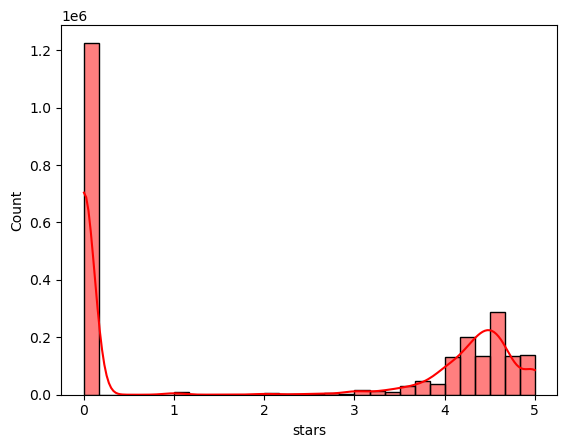

In [16]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(data = df['stars'], kde = True, bins = 30, color = 'red')

# As seen in the mode value, zero is the most common rating between customers. and that's why mean differ that much from where values are shown in 
# the plot (between 4 and 5).